In [1]:
# !pip install librosa
# !pip install audiomentations
# !pip install pandas
# !pip install matplotlib
# !pip install sklearn
# !pip install torchaudio
# !pip install imblearn
import pandas as pd
import numpy as np
import librosa as librosa
import librosa.display as display
from audiomentations import Compose, AddGaussianNoise, PitchShift
from matplotlib import pylab
from sklearn.model_selection import train_test_split
from torchaudio import transforms
from imblearn.over_sampling import SMOTE
from collections import Counter
import tensorflow as tf


In [12]:
 pd. __version__

'1.4.1'

In [ ]:
!pip install imblearn

In [ ]:
!pip install tensorflow
import pandas as pd
import numpy as np
import librosa as librosa
import librosa.display as display
from audiomentations import Compose, AddGaussianNoise, PitchShift
from matplotlib import pylab
from sklearn.model_selection import train_test_split
from torchaudio import transforms
from imblearn.over_sampling import SMOTE
from collections import Counter
import tensorflow as tf

In [1]:
import pandas as pd
import numpy as np
import librosa as librosa
import librosa.display as display
from audiomentations import Compose, AddGaussianNoise, PitchShift
from matplotlib import pylab
from sklearn.model_selection import train_test_split
from torchaudio import transforms
from imblearn.over_sampling import SMOTE
from collections import Counter
import tensorflow as tf

C:\Users\HP\anaconda3\envs\env_2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df=pd.read_csv('audio_read.csv')

In [4]:
y = np.array(df['label'].values.tolist())
X=np.array(df.loc[:, df.columns!='label'])
# labelencoder = LabelEncoder()
# df['label'] = to_categorical(labelencoder.fit_transform(df['label']))
print(df['label'].value_counts())
counter = Counter(y.ravel())
print(counter)

Negative    1820
Positive     521
Name: label, dtype: int64
Counter({'Negative': 1820, 'Positive': 521})


In [5]:
sm = SMOTE(random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (2940, 88001)
After OverSampling, the shape of train_y: (2940,) 



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

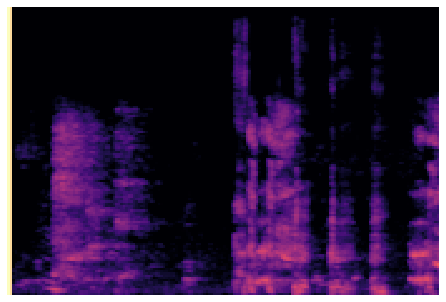

In [8]:



add_noise = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.7),
])
pitch_shift = Compose([
    PitchShift(min_semitones=-4, max_semitones=12, p=0.5),
])
#temporary list for the input data
X_train = []

#list to append all the labels
Y_train_ = []

sr=2250

def generateMel(audio):
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
    mel = librosa.feature.melspectrogram(y=audio, sr=sr)
    s_db = librosa.power_to_db(mel, ref=np.max)
    display.specshow(s_db)
    return s_db

def generateMelSpectogram():
    # looping through train data to create melspec and augment data
    for i in range(len(X_train_res)):
        try:
            print(i)
            y=y_train_res[i]
            # adding noise to the file
            noisy_audio = add_noise(X_train_res[i], 22050)
            # changing pitch of the audio
            pitch_audio = pitch_shift(X_train_res[i], 22050)

            # generate melspec for original and augmented files
            pylab.axis('off')  # no axis

            mel=generateMel(X_train_res[i])
            noise_mel = generateMel(noisy_audio)
            pitch_mel = generateMel(pitch_audio)

            # appending augmented data to original training data
            X_train.append(mel)
            Y_train_.append(y)
            X_train.append(noise_mel)
            Y_train_.append(y)
            X_train.append(pitch_mel)
            Y_train_.append(y)




        except Exception as e:
            print("Error in file:")
            print("Error:", e)
            continue

generateMelSpectogram()
print(len(X_train))
print(len(Y_train_))

In [9]:
print(len(X_train))
print(len(Y_train_))


8820
8820


In [ ]:
!pip install  pickle-mixin
import pickle

with open("y_train", "wb") as fp:   #Pickling
    pickle.dump(Y_train_, fp)


np.save("X_train_.npy",X_train)
print("done")

# Y_train__=pd.DataFrame({'label':Y_train_})
# Y_train__.to_csv('y_train.csv')
# print(Y_train_)

# with open("test", "wb") as fp:   #Pickling
# ...   pickle.dump(l, fp)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

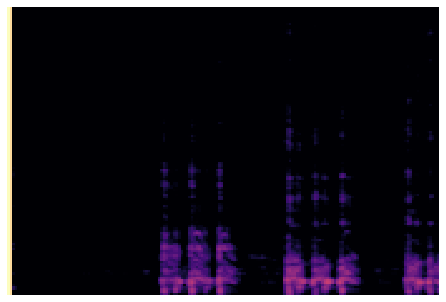

In [16]:
# temporary list for the input data
Xtest = []

# list to append all the labels
Y_test = []

# looping through train data to create melspec and augment data
# for i, dat in tqdm(enumerate(audio_test)):

def testgeneratespec():
    for i in range(len(X_test)):

        try:
            print(i)
            # generate melspec for original and augmented files
            # mel = get_melspec(dat)
            mel = generateMel(X_test[i])

            # Appending test melspec to list
            Xtest.append(mel)
            Y_test.append(y_test[i])


        except Exception as e:
            print("Error in file:")
            print("Error:", e)

testgeneratespec()



In [17]:
np.save("s_cough/X_test_.npy",Xtest)
print("done")

# Y_test_=pd.DataFrame({'label':Y_test})
# Y_test_.to_csv('y_test.csv')

# with open("s_cough/y_test", "wb") as fp:   #Pickling
#     pickle.dump(Y_test, fp)
# print("done")


done
done


In [40]:
# !pip install  pickle-mixin
# !pip install pandas
# !pip install numpy
# import pickle
import pandas as pd
import numpy as np

X_train=np.load('s_cough/X_train_.npy')
Xtest=np.load('s_cough/X_test_.npy')

# df1=pd.read_csv('y_test.csv')
# Y_train=df1['label']

# df2=pd.read_csv('y_train.csv')
# Y_test=df1['label']

# with open("y_test", "rb") as fp:   # Unpickling
#     Y_test = pickle.load(fp)
    
# with open("y_train", "rb") as fp:   # Unpickling
#     Y_train = pickle.load(fp)

X_train = np.stack(X_train)
Xtest = np.stack(Xtest)

In [41]:

# np.delete(Y_train, label)
# Y_train = np.delete(Y_train, [1], axis=1)

# Y_train = np.delete(Y_train, (0), axis=0)
# df = pd.DataFrame(Y_train,columns=['label'])
# print(df.info())
# df.to_csv('y_train.csv', index=False)

# df1 = pd.DataFrame(Y_test)
# df1.to_csv('y_test.csv', index=False)

# print("done")

import csv

with open('s_cough/y_train.csv', newline='') as f:
    reader = csv.reader(f)
    Y_train = list(reader)

print(Y_train)
Y_train.pop(0)
print(Y_train)

with open('s_cough/y_test.csv', newline='') as f:
    reader = csv.reader(f)
    Y_test = list(reader)

print(len(Y_test))
Y_test.pop(0)

!pip install sklearn
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y_train)

Y_train = encoder.transform(Y_train).reshape([len(Y_train), 1])

encoder = LabelEncoder()
encoder.fit(Y_test)

Y_test = encoder.transform(Y_test).reshape([len(Y_test), 1])

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
Xtest = Xtest.reshape(Xtest.shape[0],Xtest.shape[1],Xtest.shape[2],1)



print(X_train.shape)
print(Xtest.shape)
print(Y_train.shape)
print(Y_test.shape)

[['label'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positi

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
#importing the keras modules
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, GRU,BatchNormalization
from keras import regularizers
from keras.constraints import unit_norm
import tensorflow as tf

In [43]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(l=0.01), padding='same', input_shape=(X_train.shape[1:])))
Dropout(0.25),
model.add(Conv2D(64, kernel_size=(3, 3),strides=(2,2), activation='relu',kernel_regularizer=regularizers.l2(l=0.01),padding='same')),
model.add(MaxPooling2D((2, 2)))
BatchNormalization()
Dropout(0.2),

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))


'''
Optimizer = Adam
Loss = binary_crossentropy
'''
optimiser = tf.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimiser, metrics=['accuracy'])
model.summary()

history = model.fit(X_train, Y_train, validation_data=(Xtest,Y_test) ,batch_size=32,epochs=10)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 172, 32)      320       
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 86, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 43, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 88064)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               11272320  
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                      

In [44]:
print("saving model")
model.save('models/s_cough_model')

saving model
INFO:tensorflow:Assets written to: models/s_cough_model\assets


In [45]:
s_cough_model = tf.keras.models.load_model('models/s_cough_model')

print(s_cough_model.summary())



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 172, 32)      320       
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 86, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 43, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 88064)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               11272320  
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                      

In [37]:
# print("model acuuracy of testing data:")
# test=s_cough_model.evaluate(Xtest,Y_test)
# print(f"Test accuracy:{test[1]*100}")
# print(f"Test loss:{test[0]}")

pred1=s_cough_model.predict(Xtest)
print(pred1)
print(len(pred1))



[[2.28404999e-04]
 [4.44350541e-02]
 [2.80899588e-08]
 [2.63836503e-01]
 [5.61679258e-07]
 [4.50991988e-02]
 [2.49147415e-04]
 [9.71891999e-01]
 [1.19164586e-03]
 [1.17722154e-03]
 [7.66536396e-05]
 [1.76370144e-04]
 [2.65809894e-03]
 [2.91288495e-02]
 [6.58843994e-01]
 [1.02626681e-02]
 [9.29027796e-04]
 [9.19610262e-04]
 [8.36688059e-07]
 [1.22871339e-01]
 [6.32098017e-05]
 [3.91274393e-02]
 [2.48477318e-05]
 [9.57295179e-01]
 [1.44987702e-02]
 [2.96278158e-05]
 [8.75890732e-01]
 [2.94542313e-03]
 [2.88719912e-05]
 [6.04205125e-05]
 [5.44792414e-03]
 [1.13580718e-05]
 [2.76676595e-01]
 [3.39168012e-02]
 [1.17520690e-02]
 [2.17569649e-01]
 [7.88748264e-04]
 [5.95979989e-02]
 [4.05073166e-04]
 [3.83168459e-04]
 [8.42550695e-02]
 [8.34155381e-02]
 [9.93206382e-01]
 [2.32362308e-05]
 [3.99962373e-05]
 [1.16716325e-02]
 [9.50944424e-03]
 [1.27682090e-03]
 [1.07987225e-02]
 [5.06943464e-03]
 [7.81327486e-04]
 [8.43156447e-12]
 [5.26726246e-04]
 [1.80572271e-04]
 [3.76840234e-02]
 [1.733809

In [46]:
# pred2=s_cough_model.predict_proba(Xtest)
# print(pred2)

from sklearn.model_selection import train_test_split
import sklearn
predict_x=s_cough_model.predict(Xtest)
print((predict_x).ravel())


# a=np.exp(predict_x)
# print(a)

# y_classes = ((predict_x > 0.5)+0).ravel()

# predictions = (predict_x > 0).flatten()
# print(predictions)

[6.41015172e-03 6.29692078e-02 1.89248979e-01 9.98512089e-01
 6.04579509e-06 1.39698833e-01 1.97018087e-02 9.56607342e-01
 8.83753002e-02 4.59020823e-01 3.61800194e-04 8.96453857e-02
 4.76419926e-04 7.82485485e-01 8.54477048e-01 5.17092645e-02
 2.95662701e-01 6.33493066e-03 1.07481410e-05 8.74987841e-02
 6.00636005e-04 2.55144089e-01 7.13601839e-05 2.18403012e-01
 1.72814339e-01 9.21231329e-01 5.95447958e-01 1.10023052e-01
 5.79453707e-02 2.42561102e-04 1.54301524e-03 4.17843449e-09
 1.99809968e-01 2.77037919e-02 2.51203775e-03 6.14744306e-01
 1.26741171e-01 2.77365744e-02 4.15682793e-04 5.64562380e-02
 4.49862033e-01 5.97749770e-01 9.99083340e-01 2.60353088e-04
 2.98562646e-03 1.40389293e-01 6.08139575e-01 5.31650424e-01
 5.00432849e-02 1.24090910e-03 8.31703961e-01 2.00009930e-12
 6.99482262e-02 2.21440196e-03 3.64003956e-01 7.76205361e-02
 4.19563353e-02 9.37265396e-01 4.03412879e-02 5.81273437e-03
 3.40950489e-03 8.55945647e-01 6.47360086e-03 2.91395068e-01
 1.13451481e-03 5.749356

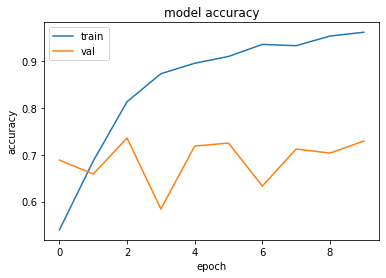

In [47]:
!pip install matplotlib
from matplotlib import pylab

pylab.plot(history.history['accuracy'])
pylab.plot(history.history['val_accuracy'])
pylab.title('model accuracy')
pylab.ylabel('accuracy')
pylab.xlabel('epoch')
pylab.legend(['train', 'val'], loc='upper left')
pylab.show()


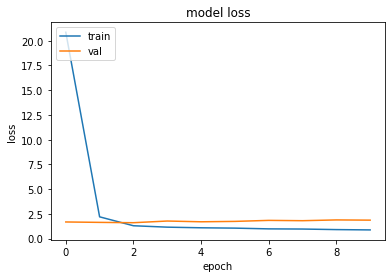

In [48]:
pylab.plot(history.history['loss'])
pylab.plot(history.history['val_loss'])
pylab.title('model loss')
pylab.ylabel('loss')
pylab.xlabel('epoch')
pylab.legend(['train', 'val'], loc='upper left')
pylab.show()

In [50]:
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# extract the predicted probabilities
p_pred = model.predict(Xtest)
p_pred = p_pred.flatten()
# print(p_pred.round(2))
# [1. 0.01 0.91 0.87 0.06 0.95 0.24 0.58 0.78 ...

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
# print(y_pred)
# [1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 ...

cf_matrix=confusion_matrix(Y_test, y_pred)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(Y_test,y_pred)
print('Classification report : \n',matrix)


Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       350
           1       0.44      0.27      0.34       119

    accuracy                           0.73       469
   macro avg       0.61      0.58      0.58       469
weighted avg       0.70      0.73      0.70       469



<AxesSubplot:>

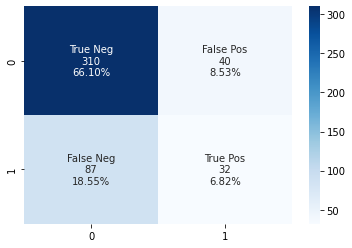

In [51]:
!pip install seaborn
import seaborn as sns


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')